<h1> Cleaning Training Dataset

In [ ]:
import numpy as np
import pandas as pd

# Import dataset
df = pd.read_csv('./datasets/train.csv')

In [ ]:
# Inspect dataset row/columns/dtypes
df.info()

In [ ]:
# Check for null values
dfcheck = pd.DataFrame(df.isna().sum())
dfcheck[0].sort_values(ascending=False).head(20)

In [ ]:
#Impute nulls for below columns with 0 to represent no hawker/mall

df[['Hawker_Within_500m','Mall_Within_500m','Hawker_Within_1km','Hawker_Within_2km','Mall_Within_1km','Mall_Within_2km']] = df[['Hawker_Within_500m','Mall_Within_500m','Hawker_Within_1km','Hawker_Within_2km','Mall_Within_1km','Mall_Within_2km']].fillna(0)

In [ ]:
# Impute nulls for column 'Mall Nearest Distance' with 'No Mall'
df['Mall_Nearest_Distance'].fillna('No Mall',inplace=True)

In [ ]:
# Check that nulls are imputed correctly
df['Mall_Nearest_Distance'].value_counts()

In [ ]:
# Verify all nulls are handled in the dataset
df.info()

In [ ]:
# Verify all nulls are handled in the dataset
dfcheck = pd.DataFrame(df.isna().sum())
dfcheck[0].sort_values(ascending=False).head(20)

In [ ]:
# Standardizing the name of columns to lower capitalization
df.columns = df.columns.str.lower()

In [ ]:
# Verify if resale price matches the other columns
df['price_check'] = df['floor_area_sqft'] * df['price_per_sqft']


In [ ]:
#filters the df to show only the rows where price_check value NOT equal to resale_price, and filtered to those 2 columns
df[df['price_check'] != df['resale_price']][['price_check','resale_price']]
#common reasons why they may not be equals is due to rounding errors

In [ ]:
#check for duplicates
df.duplicated(subset=['id']).value_counts()

In [ ]:
df.dtypes

In [ ]:
# Change tranc_yearmonth to datetime dtype
df['tranc_yearmonth'] = pd.to_datetime(df['tranc_yearmonth'], format='%Y-%m')

In [ ]:
# Drop columns that is not needed for our analysis
df.drop(['block','street_name','storey_range','floor_area_sqm','mid_storey','hdb_age','address','postal','planning_area','bus_stop_name','price_check'],axis=1,inplace=True)

In [ ]:
df.columns

In [ ]:
# Replace columns like '2room_sold' to '2room_flat' for clarity
df.columns = df.columns.str.replace('sold','flat')

In [ ]:
df.columns

#### The 'hdb_age' column in the dataset is actually computed based on current date (2025), and is not an accurate representation of the age of the HDB when the unit was sold/transacted. Hence, we will create a new column to show the actual age when the unit was sold.

In [ ]:
# New column to calculate hdb age to point of transaction 
df['age_sold'] = df['tranc_year'] - df['lease_commence_date']

In [ ]:
#Export df to new CSV
df.to_csv('clean_train.csv',index=False)

<h1> Cleaning Testing Dataset

#### Repeat cleaning steps for the Testing Dataset

In [ ]:
# Import dataset
test_df = pd.read_csv('./datasets/test.csv')

In [ ]:
# Inspect dataset row/columns/dtypes
test_df.info()

In [ ]:
# Check for null values
testdfcheck = pd.DataFrame(test_df.isna().sum())
testdfcheck[0].sort_values(ascending=False).head(20)

In [ ]:
# Impute nulls for below columns with 0 to represent no hawker/mall

test_df[['Hawker_Within_500m','Mall_Within_500m','Hawker_Within_1km','Hawker_Within_2km','Mall_Within_1km','Mall_Within_2km']] = test_df[['Hawker_Within_500m','Mall_Within_500m','Hawker_Within_1km','Hawker_Within_2km','Mall_Within_1km','Mall_Within_2km']].fillna(0)

In [ ]:
# Impute nulls for column 'Mall Nearest Distance' with 'No Mall'

test_df['Mall_Nearest_Distance'].fillna('No Mall',inplace=True)

In [ ]:
#double check for null values

testdfcheck = pd.DataFrame(test_df.isna().sum())
testdfcheck[0].sort_values(ascending=False).head(20)

In [ ]:
#check for duplicates

test_df.duplicated(subset=['id']).value_counts()

In [ ]:
#standardizing the naming of columns to all lower capitalization

test_df.columns = test_df.columns.str.lower()

In [ ]:
test_df['tranc_yearmonth'] = pd.to_datetime(test_df['tranc_yearmonth'], format='%Y-%m')

In [ ]:
# Create new target column: 'resale_price'

test_df['resale_price'] = test_df['floor_area_sqft'] * test_df['price_per_sqft']

In [ ]:
test_df.drop(['block','street_name','storey_range','floor_area_sqm','mid_storey','hdb_age','address','postal','planning_area','bus_stop_name'],axis=1,inplace=True)

In [ ]:
test_df.columns

In [ ]:
test_df.columns = test_df.columns.str.replace('sold','flat')

In [ ]:
test_df['age_sold'] = test_df['tranc_year'] - test_df['lease_commence_date']

In [56]:
test_df.columns

Index(['id', 'tranc_yearmonth', 'town', 'flat_type', 'flat_model',
       'lease_commence_date', 'tranc_year', 'tranc_month', 'lower', 'upper',
       'mid', 'full_flat_type', 'floor_area_sqft', 'price_per_sqft',
       'max_floor_lvl', 'year_completed', 'residential', 'commercial',
       'market_hawker', 'multistorey_carpark', 'precinct_pavilion',
       'total_dwelling_units', '1room_flat', '2room_flat', '3room_flat',
       '4room_flat', '5room_flat', 'exec_flat', 'multigen_flat',
       'studio_apartment_flat', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'latitude', 'longitude', 'mall_nearest_distance',
       'mall_within_500m', 'mall_within_1km', 'mall_within_2km',
       'hawker_nearest_distance', 'hawker_within_500m', 'hawker_within_1km',
       'hawker_within_2km', 'hawker_food_stalls', 'hawker_market_stalls',
       'mrt_nearest_distance', 'mrt_name', 'bus_interchange',
       'mrt_interchange', 'mrt_latitude', 'mrt_longitude',
       'bus_sto

<h1> EDA

In [57]:
import plotly.express as px
import plotly.io as pio
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [58]:
df.head()

,id,tranc_yearmonth,town,flat_type,flat_model,lease_commence_date,resale_price,tranc_year,tranc_month,lower,upper,mid,full_flat_type,floor_area_sqft,price_per_sqft,unnamed: 21,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_flat,2room_flat,3room_flat,4room_flat,5room_flat,exec_flat,multigen_flat,studio_apartment_flat,1room_rental,2room_rental,3room_rental,other_room_rental,latitude,longitude,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,age_sold
0,88471,2016-05-01,KALLANG/WHAMPOA,4 ROOM,Model A,2006,680000.0,2016,5,10,12,11,4 ROOM Model A,968.760,701.928238,680000.0,25,2005,Y,N,N,N,N,142,0,0,0,96,46,0,0,0,0,0,0,0,1.314299,103.872828,1094.090418,0.0,0.0,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504,10
1,122598,2012-07-01,BISHAN,5 ROOM,Improved,1987,665000.0,2012,7,7,9,8,5 ROOM Improved,1399.320,475.230826,665000.0,9,1987,Y,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,1.346086,103.855078,866.941448,0.0,1.0,3.0,640.151925,0.0,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892,25
2,170897,2013-07-01,BUKIT BATOK,EXECUTIVE,Apartment,1997,838000.0,2013,7,13,15,14,EXECUTIVE Apartment,1550.016,540.639580,838000.0,16,1996,Y,N,N,N,N,90,0,0,0,0,30,60,0,0,0,0,0,0,1.343867,103.760535,1459.579948,0.0,0.0,4.0,1762.082341,0.0,0.0,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013,16
3,86070,2012-04-01,BISHAN,4 ROOM,Model A,1992,550000.0,2012,4,1,5,3,4 ROOM Model A,1108.692,496.080065,550000.0,11,1990,Y,Y,N,N,N,75,0,0,0,68,7,0,0,0,0,0,0,0,1.358245,103.845504,950.175199,0.0,1.0,4.0,726.215262,0.0,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934,20
4,153632,2017-12-01,YISHUN,4 ROOM,Simplified,1987,298000.0,2017,12,1,3,2,4 ROOM Simplified,893.412,333.552717,298000.0,4,1987,Y,N,N,N,N,48,0,0,0,30,18,0,0,0,0,0,0,0,1.414745,103.835532,729.771895,0.0,1.0,2.0,1540.151439,0.0,0.0,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335,30


In [59]:
#Looking at training dataset:

df.shape

print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')

There are 150634 rows and 70 columns.


In [60]:
#display all floating-point numbers with thousands separators and rounded to 2dp

pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,id,tranc_yearmonth,lease_commence_date,resale_price,tranc_year,tranc_month,lower,upper,mid,floor_area_sqft,price_per_sqft,unnamed: 21,max_floor_lvl,year_completed,total_dwelling_units,1room_flat,2room_flat,3room_flat,4room_flat,5room_flat,exec_flat,multigen_flat,studio_apartment_flat,1room_rental,2room_rental,3room_rental,other_room_rental,latitude,longitude,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,age_sold
count,"150,634.00",150634,"150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00","150,634.00"
mean,"93,047.89",2016-12-14 08:10:49.670061056,"1,992.45","449,161.50","2,016.49",6.58,7.25,9.32,8.28,"1,046.24",434.13,"449,161.50",15.14,"1,990.92",124.68,0.14,1.78,39.22,50.08,26.30,5.94,0.02,0.45,0.06,0.62,0.06,0.00,1.37,103.84,0.49,1.79,5.17,"1,173.70",0.49,1.41,3.79,48.65,58.14,765.01,0.55,0.26,1.37,103.84,115.26,1.37,103.84,395.17,55.37,0.11,1.37,103.84,508.53,210.15,0.03,1.37,103.84,24.04
min,1.00,2012-03-01 00:00:00,"1,966.00","150,000.00","2,012.00",1.00,1.00,3.00,2.00,333.68,205.11,"150,000.00",2.00,"1,949.00",2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.27,103.69,0.00,0.00,0.00,1.87,0.00,0.00,0.00,0.00,0.00,21.97,0.00,0.00,1.27,103.70,9.00,1.27,103.68,45.67,20.00,0.00,1.27,103.69,38.91,188.00,0.00,1.28,103.69,1.00
25%,"46,469.25",2014-08-01 00:00:00,"1,984.00","347,000.00","2,014.00",4.00,4.00,6.00,5.00,807.30,364.97,"347,000.00",12.00,"1,983.00",90.00,0.00,0.00,0.00,14.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.34,103.77,0.00,1.00,3.00,372.13,0.00,0.00,1.00,40.00,0.00,458.27,0.00,0.00,1.34,103.77,75.03,1.34,103.77,227.08,44.00,0.00,1.34,103.77,290.29,188.00,0.00,1.34,103.78,15.00
50%,"93,077.50",2017-03-01 00:00:00,"1,992.00","420,000.00","2,017.00",7.00,7.00,9.00,8.00,"1,022.58",412.00,"420,000.00",13.00,"1,989.00",112.00,0.00,0.00,0.00,44.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.36,103.84,0.00,2.00,5.00,778.97,0.00,1.00,2.00,43.00,52.00,682.62,1.00,0.00,1.36,103.85,107.77,1.36,103.84,348.88,54.00,0.00,1.36,103.84,447.38,208.00,0.00,1.37,103.84,25.00
75%,"139,574.75",2019-05-01 00:00:00,"2,001.00","520,000.00","2,019.00",9.00,10.00,12.00,11.00,"1,205.57",474.06,"520,000.00",16.00,"1,999.00",144.00,0.00,0.00,66.00,73.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.39,103.90,1.00,3.00,6.00,"1,678.95",1.00,2.00,7.00,60.00,99.00,975.73,1.00,1.00,1.39,103.90,146.65,1.39,103.90,502.18,67.00,0.00,1.39,103.90,644.28,224.00,0.00,1.39,103.90,33.00
max,"185,966.00",2021-04-01 00:00:00,"2,019.00","1,258,000.00","2,021.00",12.00,49.00,51.00,50.00,"3,013.92","1,185.64","1,258,000.00",50.00,"2,018.00",570.00,255.00,225.00,528.00,316.00,164.00,135.00,66.00,142.00,110.00,452.00,24.00,2.00,1.46,103.99,6.00,15.00,43.00,"4,907.04",5.00,9.00,19.00,226.00,477.00,"3,544.50",1.00,1.00,1.45,103.99,443.96,1.46,103.99,"3,305.84",110.00,1.00,1.46,103.96,"3,638.98",260.00,1.00,1.45,103.96,54.00
std,"53,679.91",NaN,12.14,"143,307.57",2.75,3.35,5.52,5.51,5.

#### We will be using median resale_price in all our following analysis due to large std.

In [61]:
df.dtypes

id                            int64
tranc_yearmonth      datetime64[ns]
town                         object
flat_type                    object
flat_model                   object
                          ...      
cutoff_point                  int64
affiliation                   int64
sec_sch_latitude            float64
sec_sch_longitude           float64
age_sold                      int64
Length: 70, dtype: object

<h3> HDB resale prices and trends over time:

In [62]:
#reset_index() makes the output into a DF instead

df_ym_median = df.groupby(['tranc_yearmonth'])['resale_price'].median().reset_index() 
df_ym_median.rename(columns={'resale_price':'median_resale_price'},inplace=True)


df_ym_median

,tranc_yearmonth,median_resale_price
0,2012-03-01,"435,000.00"
1,2012-04-01,"435,000.00"
2,2012-05-01,"439,000.00"
3,2012-06-01,"448,000.00"
4,2012-07-01,"445,000.00"
...,...,...
105,2020-12-01,"452,000.00"
106,2021-01-01,"460,000.00"
107,2021-02-01,"460,000.00"
108,2021-03-01,"465,000.00"


In [63]:
df_ym_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   tranc_yearmonth      110 non-null    datetime64[ns]
 1   median_resale_price  110 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [64]:
fig = px.line(df_ym_median,
              x='tranc_yearmonth',
              y='median_resale_price',
              title='HDB Median Resale Prices Over Time',
              labels={'tranc_yearmonth': 'Resale Year', 'median_resale_price': 'Median Resale Price (SGD)'}
             )

fig.show()

#### Prices were on a rising trend from mid-2012, peaking around late 2012/early 2013 at just over SGD 460k. <br>

#### Following this peak, there was a significant and relatively sharp decline throughout 2013 and 2014, with prices dropping consistently until mid-2015 when the market entered a period of relative stability, with median prices fluctuating largely within the SGD 400-420k range. <br>

#### Starting from around mid-2020, significant and rapid recovery pushed prices back to near-record highs by early 2021. This last trend aligns with the general market observations of a robust HDB resale market post-COVID-19.

In [65]:
#grouping by months

df_month = df.groupby(['tranc_month'])['resale_price'].median().reset_index()
df_month.rename(columns={'resale_price':'median_resale_price'},inplace=True)
df_month

,tranc_month,median_resale_price
0,1,"424,044.00"
1,2,"420,000.00"
2,3,"426,888.00"
3,4,"425,000.00"
4,5,"420,000.00"
5,6,"417,500.00"
6,7,"420,000.00"
7,8,"420,000.00"
8,9,"420,000.00"
9,10,"420,000.00"


In [66]:
fig = px.bar(df_month,
              x='tranc_month',
              y='median_resale_price',
              title='HDB Median Resale Prices by Month',
              labels={'Tranc_Month': 'Resale Month', 'resale_price': 'Median Resale Price (SGD)'}
             )

fig.show()

#### Resale prices does not appear to be affected by any seasonality trends across months as seen in the charts above.

<h3> Average transaction volume and frequency of HDB resale flats:

In [67]:
tranc_town_year = df.groupby(['town','tranc_year'])['id'].count().reset_index().sort_values(by=['town', 'tranc_year'])
tranc_town_year.columns = ['town','tranc_year','no_of_sales']
tranc_town_year.sort_values(by='no_of_sales', ascending=False).head()

,town,tranc_year,no_of_sales
208,SENGKANG,2020,1729
257,YISHUN,2019,1480
240,WOODLANDS,2012,1461
247,WOODLANDS,2019,1460
178,PUNGGOL,2020,1444


In [68]:
fig = px.bar(tranc_town_year,
             x='town',
             y='no_of_sales',
             color='tranc_year',
             title='No. of Sales by Town and Year')
fig.show()

In [69]:
fig = px.line(tranc_town_year,
              x='tranc_year',
              y='no_of_sales',
              color='town',
              markers=True,
              height = 750,
              title='No. of Sales by Town per Year')
fig.update_layout(xaxis=dict(dtick=1))
fig.show()

<h3> HDB Resale Prices by regions of Singapore:

In [ ]:
# No. of unique towns in Singapore

df['town'].nunique()

26

In [71]:
median_resale_town = df.groupby(['town'])['resale_price'].median().sort_values()

In [72]:
# Bar plot of Resale Price ($) VS Town
fig1 = px.bar(x = median_resale_town.index, 
              y = median_resale_town, 
              width = 800, 
              height = 500)
fig1.update_layout(title = {'text' : 'Median Resale Price ($) VS Town', 'x' : 0.5, 'xanchor' : 'center'}, xaxis_title_text='Town', yaxis_title_text='Median Resale Price ($)')
fig1.update_traces(hovertemplate ='Town: %{x}<br>Resale Price: $%{y}<br><extra></extra>')
fig1.show()

#### Median resale prices varies by town with Bukit Timah, Bishan, Bukit Merah, Queenstown and Central Area commanding the top 5 highest median resale prices.

<h3> HDB Resale Prices by flat type:

In [73]:
median_resale_flat_type = df.groupby(['flat_type'])['resale_price'].median().sort_values()

In [74]:
# Bar plot of Resale Price ($) VS Flat Type
fig2 = px.bar(x = median_resale_flat_type.index, 
              y = median_resale_flat_type, 
              width = 800, 
              height = 500)
fig2.update_layout(title = {'text' : 'Median Resale Price ($) VS Flat Type', 'x' : 0.5, 'xanchor' : 'center'}, xaxis_title_text='Flat Type', yaxis_title_text='Median Resale Price ($)')
fig2.update_traces(hovertemplate ='Flat Type: %{x}<br>Resale Price: $%{y}<br><extra></extra>')
fig2.show()

#### Observed a positive correlation between resale price and the flat type, with larger flat types (more rooms) having higher prices.

In [75]:
median_resale_full_flat_type = df.groupby(['full_flat_type', 'flat_type'])['resale_price'].median().reset_index().sort_values(by = ['flat_type', 'resale_price'])

In [76]:
# Bar plot of Resale Price ($) VS Full Flat Type
fig3 = px.bar(median_resale_full_flat_type, 
              x = 'full_flat_type', 
              y = 'resale_price', 
              color = 'flat_type', 
              width = 1200, 
              height = 800)
fig3.update_layout(title = {'text' : 'Median Resale Price ($) VS Full Flat Type', 'x' : 0.5, 'xanchor' : 'center'}, xaxis_title_text='Full Flat Type', yaxis_title_text='Median Resale Price ($)')
fig3.update_traces(hovertemplate ='Full Flat Type: %{x}<br>Resale Price: $%{y}<br><extra></extra>')
fig3.show()

In [96]:
top_5_town = ['BUKIT TIMAH', 'BISHAN', 'BUKIT MERAH', 'QUEENSTOWN', 'CENTRAL AREA']
median_resale_flat_type_top5town = df[df['town'].isin(top_5_town)].groupby(['flat_type', 'town'])['resale_price'].median().reset_index().sort_values(by = ['resale_price', 'flat_type'])
median_resale_flat_type_top5town.head()

,flat_type,town,resale_price
0,1 ROOM,BUKIT MERAH,"209,000.00"
3,2 ROOM,QUEENSTOWN,"256,000.00"
1,2 ROOM,BUKIT MERAH,"260,000.00"
2,2 ROOM,CENTRAL AREA,"274,000.00"
8,3 ROOM,QUEENSTOWN,"360,000.00"


In [78]:
# Bar plot of Resale Price ($) VS Full Flat Type in Top 5 Most Expensive Towns
fig4 = px.bar(median_resale_flat_type_top5town, 
              x = 'town', 
              y = 'resale_price', 
              color = 'flat_type', 
              barmode = 'group', 
              custom_data = 'flat_type', 
              width = 1200, 
              height = 800)
fig4.update_layout(title = {'text' : 'Median Resale Price ($) VS Flat Types in Top 5 Most Expensive Towns', 'x' : 0.5, 'xanchor' : 'center'}, 
                   xaxis_title_text='Town', 
                   yaxis_title_text='Median Resale Price ($)', 
                   bargap=0)
fig4.update_traces(hovertemplate ='Town: %{x}<br>Flat Type: %{customdata[0]}<br>Resale Price: $%{y}<extra></extra>')
fig4.show()

<h2> Looking at correlation features: 

In [79]:
df.columns

Index(['id', 'tranc_yearmonth', 'town', 'flat_type', 'flat_model',
       'lease_commence_date', 'resale_price', 'tranc_year', 'tranc_month',
       'lower', 'upper', 'mid', 'full_flat_type', 'floor_area_sqft',
       'price_per_sqft', 'unnamed: 21', 'max_floor_lvl', 'year_completed',
       'residential', 'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion', 'total_dwelling_units', '1room_flat', '2room_flat',
       '3room_flat', '4room_flat', '5room_flat', 'exec_flat', 'multigen_flat',
       'studio_apartment_flat', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'latitude', 'longitude', 'mall_nearest_distance',
       'mall_within_500m', 'mall_within_1km', 'mall_within_2km',
       'hawker_nearest_distance', 'hawker_within_500m', 'hawker_within_1km',
       'hawker_within_2km', 'hawker_food_stalls', 'hawker_market_stalls',
       'mrt_nearest_distance', 'mrt_name', 'bus_interchange',
       'mrt_interchange', 'mrt_latitude', '

In [ ]:
# Numerical columns in the dataset we want to use for analysis
selected_num_columns = [
    'resale_price',
    'floor_area_sqft',
    'age_sold',
    'mid',
    'mrt_nearest_distance',
    'mall_nearest_distance',
    'mall_within_2km',
    'hawker_nearest_distance',
    'hawker_within_2km',
    'bus_stop_nearest_distance',
    'pri_sch_nearest_distance',
    'sec_sch_nearest_dist',
    'vacancy',
    'cutoff_point',
    'bus_interchange',
    'mrt_interchange'
]

In [81]:
df_subset = df[selected_num_columns]
correlation_matrix = df_subset.corr(numeric_only=True)

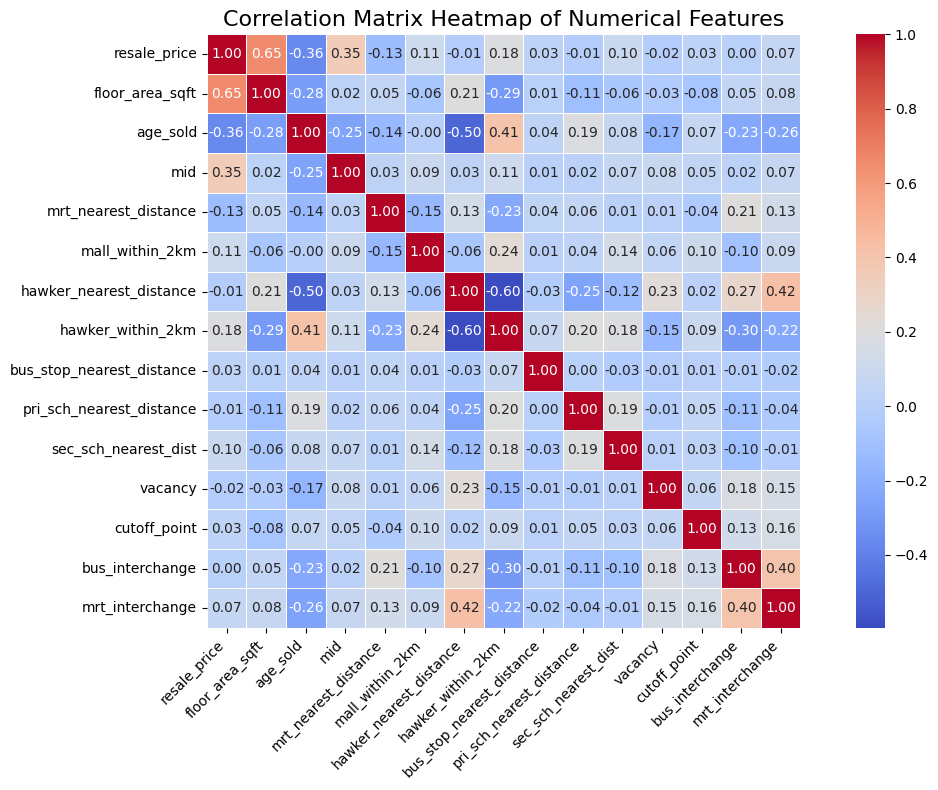

In [82]:
plt.figure(figsize=(12, 8))

sns.heatmap(
    correlation_matrix,
    annot=True,         
    cmap='coolwarm',   
    fmt=".2f",          
    linewidths=.5,      
    cbar=True,          
    square=True         
)

plt.title('Correlation Matrix Heatmap of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)             
plt.tight_layout()                 
plt.show()

#### Floor_area_sqft, age_sold, mid (median storey level of the unit) and MRT nearest distance are possible columns we can use as our features.

In [ ]:
# Identify categorical columns in dataset
df.dtypes[df.dtypes =='object']

town                     object
flat_type                object
flat_model               object
full_flat_type           object
residential              object
commercial               object
market_hawker            object
multistorey_carpark      object
precinct_pavilion        object
mall_nearest_distance    object
mrt_name                 object
pri_sch_name             object
sec_sch_name             object
dtype: object

#### Since flat types are categorized in a certain order based on their number of rooms in general, we can use ordinal mapping for this feature.

#### For town, we can use one-hot encoding to be used for our model since they are in random order with no relationship to each other.

In [ ]:
# Ordinal mapping for Flat Types

flat_type_ordinal_map = {
    '1 ROOM': 0,
    '2 ROOM': 1,
    '3 ROOM': 2,
    '4 ROOM': 3,
    '5 ROOM': 4,
    'EXECUTIVE': 5,
    'MULTI-GENERATION': 6
}

df['flat_type_ordinal'] = df['flat_type'].map(flat_type_ordinal_map)

In [ ]:
#One-hot encoding for town 

df['town'].value_counts()

town
JURONG WEST        11451
WOODLANDS          11334
SENGKANG           11069
TAMPINES           10506
YISHUN             10042
BEDOK               9046
PUNGGOL             7793
HOUGANG             7555
ANG MO KIO          6908
CHOA CHU KANG       6343
BUKIT MERAH         5854
BUKIT PANJANG       5686
BUKIT BATOK         5623
TOA PAYOH           4817
PASIR RIS           4763
KALLANG/WHAMPOA     4340
QUEENSTOWN          4121
GEYLANG             3986
SEMBAWANG           3723
CLEMENTI            3633
JURONG EAST         3470
SERANGOON           3123
BISHAN              2871
CENTRAL AREA        1249
MARINE PARADE        959
BUKIT TIMAH          369
Name: count, dtype: int64

In [ ]:
# Drop first column to prevent multicollinearity
town_dummydf = pd.get_dummies(df['town'],prefix='town',drop_first=True)
town_dummydf

,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150629,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
150630,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
150631,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
150632,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [87]:
df_dummies = pd.concat([df,town_dummydf],axis=1)
df_dummies

,id,tranc_yearmonth,town,flat_type,flat_model,lease_commence_date,resale_price,tranc_year,tranc_month,lower,upper,mid,full_flat_type,floor_area_sqft,price_per_sqft,unnamed: 21,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_flat,2room_flat,3room_flat,4room_flat,5room_flat,exec_flat,multigen_flat,studio_apartment_flat,1room_rental,2room_rental,3room_rental,other_room_rental,latitude,longitude,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,age_sold,flat_type_ordinal,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN
0,88471,2016-05-01,KALLANG/WHAMPOA,4 ROOM,Model A,2006,"680,000.00",2016,5,10,12,11,4 ROOM Model A,968.76,701.93,"680,000.00",25,2005,Y,N,N,N,N,142,0,0,0,96,46,0,0,0,0,0,0,0,1.31,103.87,"1,094.09",0.00,0.00,7.00,154.75,1.00,3.00,13.00,84,60,330.08,Kallang,0,0,1.31,103.87,29.43,1.31,103.87,"1,138.63",Geylang Methodist School,78,1,1.32,103.88,"1,138.63",Geylang Methodist School,224,0,1.32,103.88,10,3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,122598,2012-07-01,BISHAN,5 ROOM,Improved,1987,"665,000.00",2012,7,7,9,8,5 ROOM Improved,"1,399.32",475.23,"665,000.00",9,1987,Y,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,1.35,103.86,866.94,0.00,1.00,3.00,640.15,0.00,1.00,7.00,80,77,903.66,Bishan,1,1,1.35,103.85,58.21,1.35,103.86,415.61,Kuo Chuan Presbyterian Primary School,45,1,1.35,103.85,447.89,Kuo Chuan Presbyterian Secondary School,232,0,1.35,103.85,25,4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,170897,2013-07-01,BUKIT BATOK,EXECUTIVE,Apartment,1997,"838,000.00",2013,7,13,15,14,EXECUTIVE Apartment,"1,550.02",540.64,"838,000.00",16,1996,Y,N,N,N,N,90,0,0,0,0,30,60,0,0,0,0,0,0,1.34,103.76,"1,459.58",0.00,0.00,4.00,"1,762.08",0.00,0.00,1.00,84,95,"1,334.25",Bukit Batok,1,0,1.35,103.75,214.75,1.34,103.76,498.85,Keming Primary School,39,0,1.35,103.76,180.07,Yusof Ishak Secondary School,188,0,1.34,103.76,16,5,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,86070,2012-04-01,BISHAN,4 ROOM,Model A,1992,"550,000.00",2012,4,1,5,3,4 ROOM Model A,"1,108.69",496.08,"550,000.00",11,1990,Y,Y,N,N,N,75,0,0,0,68,7,0,0,0,0,0,0,0,1.36,103.85,950.18,0.00,1.00,4.00,726.22,0.00,1.00,9.00,32,86,907.45,Bishan,1,1,1.35,103.85,43.40,1.36,103.85,389.52,Catholic High School,20,1,1.35,103.84,389.52,Catholic High School,253,1,1.35,103.84,20,3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,153632,2017-12-01,YISHUN,4 ROOM,Simplified,1987,"298,000.00",2017,12,1,3,2,4 ROOM Simplified,893.41,333.55,"298,000.00",4,1987,Y,N,N,N,N,48,0,0,0,30,18,0,0,0,0,0,0,0,1.41,103.84,729.77,0.00,1.00,2.00,"1,540.15",0.00,0.00,1.00,45,0,412.34,Khatib,0,0,1.42,103.83,129.42,1.42,103.84,401.20,Naval Base Primary School,74,0,1.42,103.84,312.03,Orchid Park Secondary School,208,0,1

In [88]:
town_dummydf.columns

Index(['town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH',
       'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA',
       'town_CHOA CHU KANG', 'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG',
       'town_JURONG EAST', 'town_JURONG WEST', 'town_KALLANG/WHAMPOA',
       'town_MARINE PARADE', 'town_PASIR RIS', 'town_PUNGGOL',
       'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG', 'town_SERANGOON',
       'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS', 'town_YISHUN'],
      dtype='object')

In [89]:
test_feature_cols = ['floor_area_sqft','age_sold','mid','hawker_within_2km','mrt_nearest_distance','flat_type_ordinal', 'tranc_year',
                'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK',
                'town_BUKIT MERAH', 'town_BUKIT PANJANG', 'town_BUKIT TIMAH',
                'town_CENTRAL AREA', 'town_CHOA CHU KANG', 'town_CLEMENTI',
                'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST',
                'town_KALLANG/WHAMPOA', 'town_MARINE PARADE', 'town_PASIR RIS',
                'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG',
                'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS',
                'town_YISHUN','resale_price']

In [90]:
test_feature_corr = df_dummies[test_feature_cols].corr()

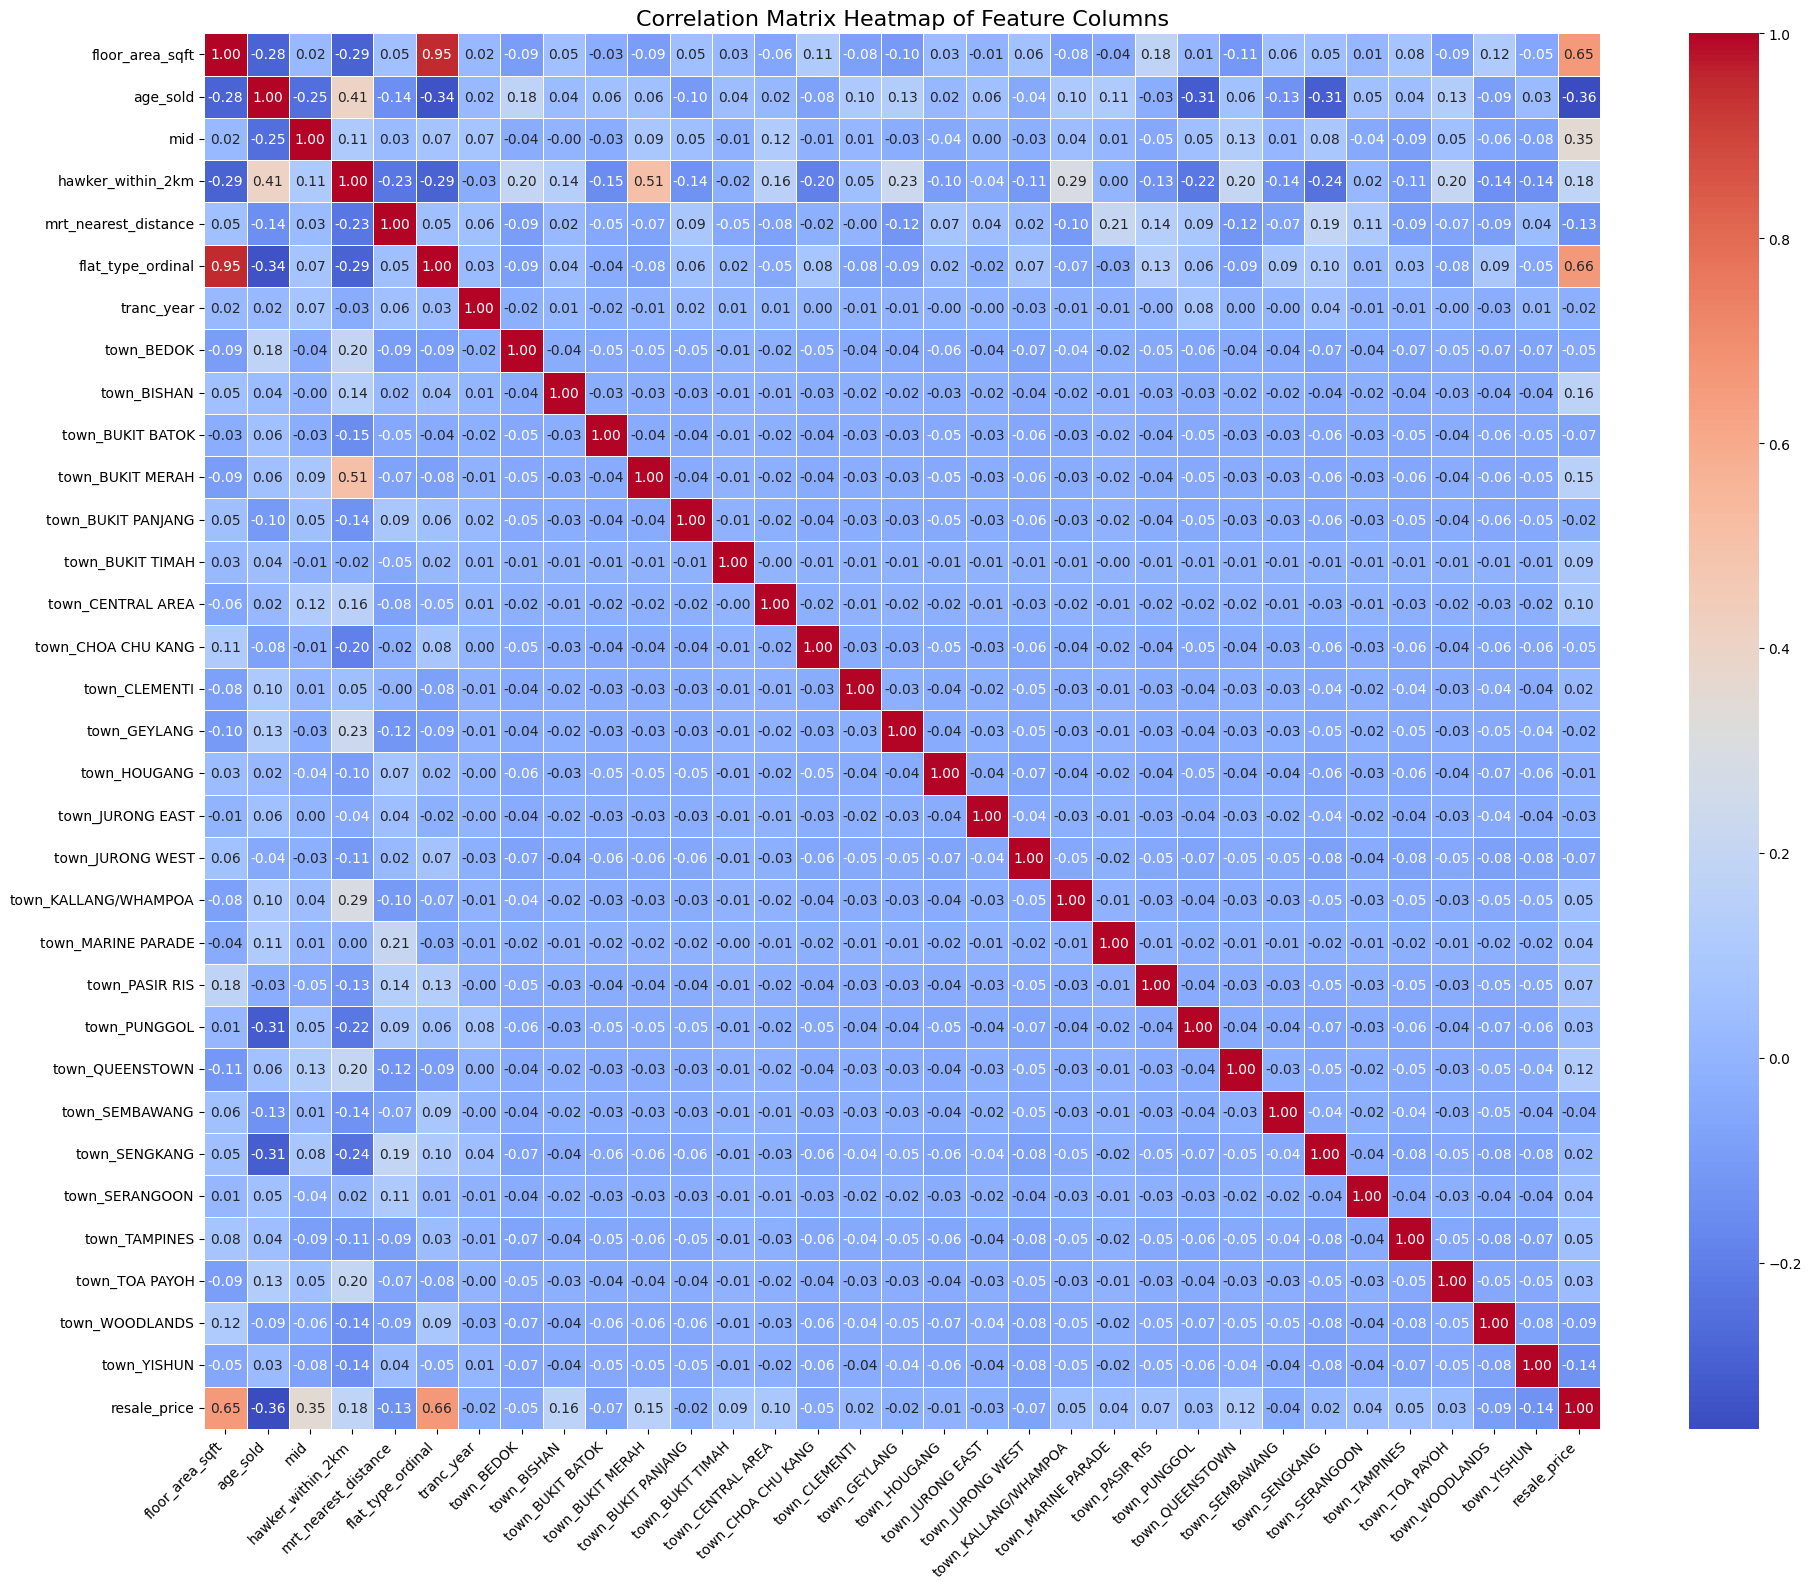

In [91]:
plt.figure(figsize=(20, 16))

sns.heatmap(
    test_feature_corr,
    annot=True,         
    cmap='coolwarm',   
    fmt=".2f",          
    linewidths=.5,      
    cbar=True,          
    square=True         
)

plt.title('Correlation Matrix Heatmap of Feature Columns', fontsize=16)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)             
plt.tight_layout()                 
plt.show()

#### As floor area and flat type has a high colinearity value of 0.95, we will only keep floor_area_sqft as part of our model feature_columns and drop flat_type_ordinal

In [92]:
df_dummies = df_dummies.drop('flat_type_ordinal',axis=1)

In [ ]:
# Export train df with dummy columns as CSV
df_dummies.to_csv('df_dummies.csv',index=False)

In [ ]:
# Repeat same process with test dataset and export as CSV
test_town_dummydf = pd.get_dummies(test_df['town'],prefix='town',drop_first=True)
test_df_dummies = pd.concat([test_df,test_town_dummydf],axis=1)
test_df_dummies

,id,tranc_yearmonth,town,flat_type,flat_model,lease_commence_date,tranc_year,tranc_month,lower,upper,mid,full_flat_type,floor_area_sqft,price_per_sqft,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_flat,2room_flat,3room_flat,4room_flat,5room_flat,exec_flat,multigen_flat,studio_apartment_flat,1room_rental,2room_rental,3room_rental,other_room_rental,latitude,longitude,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,resale_price,age_sold,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN
0,114982,2012-11-01,YISHUN,4 ROOM,Simplified,1987,2012,11,7,9,8,4 ROOM Simplified,904.18,399.26,12,1986,Y,Y,N,N,N,132,0,0,0,92,40,0,0,0,0,0,0,0,1.44,103.83,877.43,0.00,2.00,4.00,687.58,0.00,1.00,1.00,56,123,686.66,Canberra,0,0,1.44,103.83,75.68,1.44,103.83,426.47,Ahmad Ibrahim Primary School,92,0,1.43,103.83,156.32,Ahmad Ibrahim Secondary School,218,0,1.44,103.83,"361,000.00",25,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,95653,2019-08-01,JURONG WEST,5 ROOM,Premium Apartment,2008,2019,8,4,6,5,5 ROOM Premium Apartment,"1,205.57",398.15,14,2002,Y,N,N,N,N,53,0,0,0,28,25,0,0,0,0,0,0,0,1.34,103.70,534.04,0.00,1.00,3.00,"2,122.35",0.00,0.00,0.00,72,94,169.48,Pioneer,0,0,1.34,103.70,88.99,1.34,103.70,439.76,Jurong West Primary School,45,0,1.34,103.70,739.37,Jurong West Secondary School,199,0,1.34,103.70,"480,000.00",11,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,40303,2013-10-01,ANG MO KIO,3 ROOM,New Generation,1980,2013,10,7,9,8,3 ROOM New Generation,731.95,479.39,12,1979,Y,N,N,N,N,218,0,0,191,22,1,1,0,0,0,0,3,0,1.37,103.85,817.05,0.00,2.00,3.00,152.29,1.00,3.00,11.00,50,100,694.22,Ang Mo Kio,1,0,1.37,103.85,86.30,1.37,103.85,355.88,Jing Shan Primary School,36,0,1.37,103.85,305.07,Anderson Secondary School,245,0,1.37,103.85,"350,888.00",33,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,109506,2017-10-01,WOODLANDS,4 ROOM,New Generation,1979,2017,10,1,3,2,4 ROOM New Generation,"1,044.11",306.48,14,1976,Y,N,N,N,N,104,0,0,0,104,0,0,0,0,0,0,0,0,1.44,103.77,"1,272.74",0.00,0.00,3.00,501.89,0.00,1.00,2.00,52,112,"1,117.20",Marsiling,0,0,1.43,103.77,108.46,1.44,103.77,929.74,Marsiling Primary School,54,0,1.43,103.77,433.45,Woodlands Secondary School,188,0,1.44,103.77,"320,000.00",38,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,100149,2016-08-01,BUKIT BATOK,4 ROOM,Model A,1985,2016,8,16,18,17,4 ROOM Model A,"1,108.69",360.78,25,1985,Y,N,N,N,N,144,0,0,0,48,96,0,0,0,0,0,0,0,1.35,103.74,"1,070.96",0.00,0.00,5.00,437.59,1.00,2.00,2.00,60,87,987.98,Chinese Garden,0,0,1.34,103.73,113.65,1.35,103.74,309.93,Princess Elizabeth Primary School,40,0,1.35,103.74,217.30,Bukit Batok Secondary School,223,0,1.35,103.74,"399,999.00",31,False,False,True,False,False,False

In [95]:
test_df_dummies.to_csv('test_df_dummies.csv',index=False)